In [41]:
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [4]:
iris = pd.read_csv('iris.csv')
print(iris.shape)
print(iris.head())
print(iris.columns)
print(iris.info())

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [8]:
X = iris[iris.columns[:-1]]
Y = iris[iris.columns[-1]]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 100)

In [16]:
gini_impurity = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)

In [18]:
gini_impurity.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [20]:
y_pred = gini_impurity.predict(X_test)

In [32]:
print(y_pred)
gini_impurity.feature_importances_

['virginica' 'setosa' 'virginica' 'setosa' 'virginica' 'virginica'
 'setosa' 'setosa' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'virginica' 'setosa' 'virginica' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica'
 'virginica' 'setosa']


array([0.00409716, 0.        , 0.57091525, 0.42498759])

In [22]:
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


In [23]:
print(accuracy_score(y_test, y_pred))

0.9555555555555556


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.91      0.91      0.91        11
   virginica       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [25]:
information_gain = DecisionTreeClassifier(criterion='entropy', random_state = 100,max_depth=3, min_samples_leaf=5)

In [26]:
information_gain.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [27]:
ypred = information_gain.predict(X_test)

In [28]:
ypred

array(['virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa'], dtype=object)

In [29]:
print(accuracy_score(y_test, ypred))

0.9555555555555556


In [30]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.91      0.91      0.91        11
   virginica       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.91      0.91      0.91        11
   virginica       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\nentropy = 1.58\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\nentropy = 0.993\nsamples = 71\nvalue = [0, 39, 32]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.85\nentropy = 0.378\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 1.0\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(251.10000000000002, 81.53999999999999, 'X[0] <= 5.95\nentropy = 0.211\nsamples = 30\nvalue = [0, 1, 29]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.65\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 24\nvalue = [0, 0, 24]')]

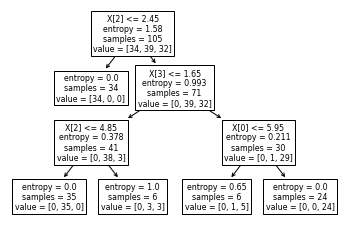

In [42]:
plot_tree(information_gain.fit(X_train, y_train)) 

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\ngini = 0.495\nsamples = 71\nvalue = [0, 39, 32]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(251.10000000000002, 81.53999999999999, 'X[0] <= 5.95\ngini = 0.064\nsamples = 30\nvalue = [0, 1, 29]'),
 Text(209.25, 27.180000000000007, 'gini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24]')]

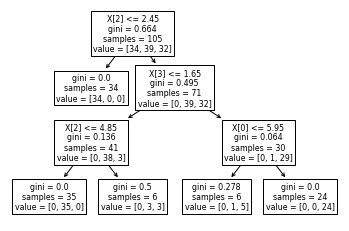

In [43]:
plot_tree(gini_impurity.fit(X_train, y_train))